In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from collections import OrderedDict
cp = pd.read_csv("data.csv")
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.1+ MB


In [2]:
cp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
cp['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

In [4]:
cp = cp[cp['Transmission Type'] != 'UNKNOWN']
cp['Transmission Type'].value_counts()

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
Name: Transmission Type, dtype: int64

In [5]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null object
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.2+ MB


In [6]:
cp = cp.replace({'AUTOMATIC':'1'})
cp = cp.replace({'MANUAL':'2'})
cp = cp.replace({'AUTOMATED_MANUAL':'3'})
cp = cp.replace({'DIRECT_DRIVE':'4'})
cp['Transmission Type'].value_counts()

1    8266
2    2935
3     626
4      68
Name: Transmission Type, dtype: int64

In [7]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null object
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.2+ MB


In [8]:
cp["Transmission Type"] = pd.to_numeric(cp["Transmission Type"])
cp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11895 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11895 non-null object
Model                11895 non-null object
Year                 11895 non-null int64
Engine Fuel Type     11892 non-null object
Engine HP            11826 non-null float64
Engine Cylinders     11865 non-null float64
Transmission Type    11895 non-null int64
Driven_Wheels        11895 non-null object
Number of Doors      11889 non-null float64
Market Category      8169 non-null object
Vehicle Size         11895 non-null object
Vehicle Style        11895 non-null object
highway MPG          11895 non-null int64
city mpg             11895 non-null int64
Popularity           11895 non-null int64
MSRP                 11895 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 1.2+ MB


In [9]:
cp = cp.drop('Popularity',axis=1)
cp = cp.drop('Market Category',axis=1)
cp['Age']=2017-cp['Year']
cp.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP,Age
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,2,rear wheel drive,2.0,Compact,Coupe,26,19,46135,6
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2,rear wheel drive,2.0,Compact,Convertible,28,19,40650,6
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,2,rear wheel drive,2.0,Compact,Coupe,28,20,36350,6
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2,rear wheel drive,2.0,Compact,Coupe,28,18,29450,6
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,2,rear wheel drive,2.0,Compact,Convertible,28,18,34500,6


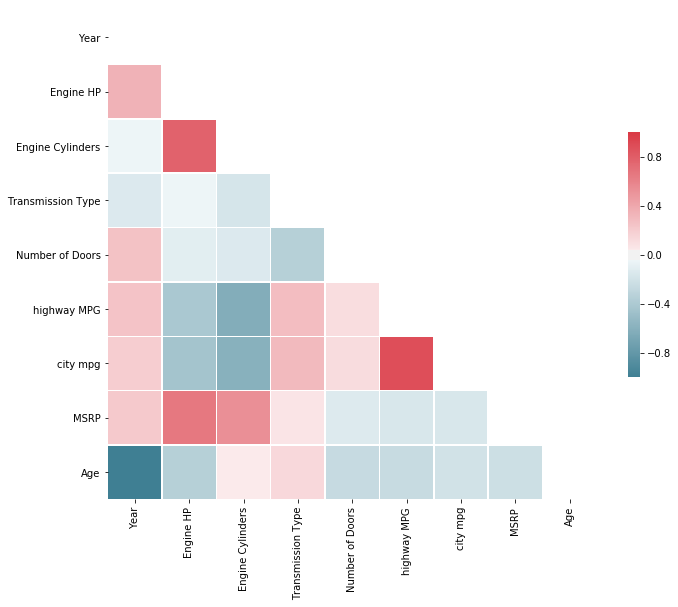

In [10]:
corr=cp.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [12]:
cp['Age'].isnull().any()

False